In [3]:
# Libraries: Numpy, Pandas, Matplotlib, Keras, Sklearn.

import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# NEURAL NETWORK ALGORITHM

def prediccion(csv_dataset, n_train_events, capa_input, funcion_activacion, capas_ocultas, capa_output, n_epochs, csv_test):

    # 1) LECTURA DEL CONJUNTO DE DATOS
    
    df = pd.read_csv(csv_dataset,parse_dates=[0],   header=None,index_col=0,squeeze=True, names=['nº', 'M0DO 1','MODO 2', 'MODO 3', 'MODO 4', 'MODO 5', 'DESPL 1', 'DESPL 2',  'DESPL 3',  'DESPL 4',  'DESPL 5', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', "I1", "I2", "I3", "I4", "I5", "I6"])
    
    # 2) MANIPULACION DEL CONJUNTO DE DATOS
    
    # Separacion entre datos de entramiento de red (train) y datos de testeo de la red (test) --> filas
    values = df.values #agrupacion del conjunto de datos en un vector o array
    train = values[:n_train_events, :] #definicion del intervalo que indica los valores usados para train [fila0:fila_final, columna0:columna_final]
    test = values[n_train_events:, :] #definicion del intervalo que indica los valores usados para test
    # Separacion entre datos de entrada (inputs) y datos de salida (outputs) --> columnas
    X_train, y_train = train[:, 0:5], train[:, 16:]
    X_test, y_test = test[:, 0:5], test[:, 16:]
    #X_train: inputs de entrenamiento // y_train: outputs de entrenamiento
    #X_test: inputs de testeo // y_test: outputs de entrenamiento
    
    # 3) CREACION DE LA RED NEURONAL
    #Inicializacion de la secuencia de capas
    model = Sequential()#utilizaccion de funcion de activacion RELU (existen Sigmoide, tangente hiperbolica, lineal,etc)

    # Adicion de la capa de entrada y la primer capa oculta
    model.add(Dense(capas_ocultas, activation = funcion_activacion, input_dim = capa_input)) #5: cantidad de datos de entrada, 32: cantidad de neuronas de la primer capa oculta

    # Agrego la segunda capa oculta
    model.add(Dense(units = capas_ocultas, activation = funcion_activacion))#32:cantidad de neuronas de la segunda capa oculta

    # Agrego la tercera capo oculta
    model.add(Dense(units = capas_ocultas, activation = funcion_activacion))#32: cantidad de neuronas de la tercer capa oculta

    # Agrego la tercera capo oculta
    model.add(Dense(units = capas_ocultas, activation = funcion_activacion))#32: cantidad de neuronas de la cuarta capa oculta

    # Agrego la capa de salida
    model.add(Dense(units = capa_output)) #6: cantidad de neuronas de salida
    
    # COMPILACION  DE LA RED NEURONAL

    # Compilacion de la red neuronal
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Ajuste de la red a los datos de entrenamiento de red
    history = model.fit(X_train, y_train, batch_size = 300, epochs = n_epochs,validation_data=(X_test,y_test))

    # valores de prediccion 
    y_pred = model.predict(X_test)
    
    #4) VERIFICO COMO FUNCIONA LA RED CON DATOS MIOS

    #Realizo una prediccion inventada y guardada en un csv ("prueba_puente.csv")
    prueba_puente = pd.read_csv(csv_test,parse_dates=[0],   header=None,index_col=0,squeeze=True, names=['nº', 'M0DO 1','MODO 2', 'MODO 3', 'MODO 4', 'MODO 5', 'DESPL 1', 'DESPL 2',  'DESPL 3',  'DESPL 4',  'DESPL 5', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', "I1", "I2", "I3", "I4", "I5", "I6"])
    values = prueba_puente.values
    # Armo un array con los datos del archivo .csv
    prueba = values[:, 0:5]

    #ejecuto el modelo de prediccion para los valores guardados en la variable prueba
    prediccion = model.predict(prueba)

    #Imprimo los valores de entrada y los salida calculados por la red
    entrada = print(f"Valores de entrada: {prueba} ")
    prediccion = print(f"Valores de salida: {prediccion}")

    #Guardo la prediccion en un archivo .csv
    #np.savetxt("prediccion_pasarela50000.csv", prediccion, delimiter=",")
    
    #5) GRAFICO DE LA RELACION ENTRE y_pred y y_real
    
    for i in range(0,10):
        plt.figure(figsize=(10,10))
        plt.plot(y_test[i], color = 'red')
        plt.plot(y_pred[i], color = 'blue')
        plt.title(f'Estructura {i} prediccion vs Real ')
        plt.xlabel('Nº de barra')
        plt.ylabel('%Rigidez Flexional')
        plt.show()
       
    #6) GRAFICO DE loss vs epochs
    
    #Obtengo metrics

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = 1000

    #Grafico el decaimiento del loss respecto al aumento de epochs
    plt.figure(figsize=(10,10))
    epocas = range(0,epochs)
    plt.scatter(epocas, loss,c='g')
    plt.scatter(epocas, val_loss ,c='r')
    plt.title('Graph Loss vs. Epochs')
    plt.show()
    
    return 

Train on 13000 samples, validate on 2000 samples
Epoch 1/1000
13000/13000 [==============================] - 0s 17us/step - loss: 6679.5332 - val_loss: 1123.1054
Epoch 2/1000
13000/13000 [==============================] - 0s 6us/step - loss: 426.8648 - val_loss: 248.3238
Epoch 3/1000
13000/13000 [==============================] - 0s 6us/step - loss: 233.8994 - val_loss: 229.0483
Epoch 4/1000
13000/13000 [==============================] - 0s 6us/step - loss: 221.9709 - val_loss: 220.0817
Epoch 5/1000
13000/13000 [==============================] - 0s 6us/step - loss: 212.6120 - val_loss: 211.9899
Epoch 6/1000
13000/13000 [==============================] - 0s 6us/step - loss: 204.8617 - val_loss: 205.5162
Epoch 7/1000
13000/13000 [==============================] - 0s 7us/step - loss: 198.2638 - val_loss: 199.5881
Epoch 8/1000
13000/13000 [==============================] - 0s 6us/step - loss: 191.0755 - val_loss: 191.8478
Epoch 9/1000
13000/13000 [==============================] - 0s 6us/s

13000/13000 [==============================] - 0s 7us/step - loss: 31.4256 - val_loss: 27.4698
Epoch 76/1000
13000/13000 [==============================] - 0s 5us/step - loss: 27.6809 - val_loss: 25.0537
Epoch 77/1000
13000/13000 [==============================] - 0s 5us/step - loss: 25.8454 - val_loss: 28.5735
Epoch 78/1000
13000/13000 [==============================] - 0s 5us/step - loss: 23.7632 - val_loss: 22.9198
Epoch 79/1000
13000/13000 [==============================] - 0s 5us/step - loss: 20.3685 - val_loss: 18.5519
Epoch 80/1000
13000/13000 [==============================] - 0s 5us/step - loss: 17.1621 - val_loss: 14.8853
Epoch 81/1000
13000/13000 [==============================] - 0s 5us/step - loss: 14.3276 - val_loss: 13.8784
Epoch 82/1000
13000/13000 [==============================] - 0s 5us/step - loss: 12.1297 - val_loss: 10.7080
Epoch 83/1000
13000/13000 [==============================] - 0s 5us/step - loss: 9.8693 - val_loss: 8.5302
Epoch 84/1000
13000/13000 [========

13000/13000 [==============================] - 0s 5us/step - loss: 0.9382 - val_loss: 0.8370
Epoch 152/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.9163 - val_loss: 0.6608
Epoch 153/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.7256 - val_loss: 0.8070
Epoch 154/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.9647 - val_loss: 1.0947
Epoch 155/1000
13000/13000 [==============================] - 0s 7us/step - loss: 1.0297 - val_loss: 0.8952
Epoch 156/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.8492 - val_loss: 1.0572
Epoch 157/1000
13000/13000 [==============================] - 0s 8us/step - loss: 1.0419 - val_loss: 1.1832
Epoch 158/1000
13000/13000 [==============================] - 0s 13us/step - loss: 0.8507 - val_loss: 0.8540
Epoch 159/1000
13000/13000 [==============================] - 0s 11us/step - loss: 0.7813 - val_loss: 0.6948
Epoch 160/1000
13000/13000 [=============

Epoch 227/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.6230 - val_loss: 1.5181
Epoch 228/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.8230 - val_loss: 0.3619
Epoch 229/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.4689 - val_loss: 0.4392
Epoch 230/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.7364 - val_loss: 0.4498
Epoch 231/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.9039 - val_loss: 0.7925
Epoch 232/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.7389 - val_loss: 0.4178
Epoch 233/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3795 - val_loss: 0.4183
Epoch 234/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.5882 - val_loss: 0.4507
Epoch 235/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.5194 - val_loss: 0.3705
Epoch 236/1000
13000/13000 [

Epoch 303/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.5974 - val_loss: 0.7154
Epoch 304/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.3211 - val_loss: 0.1945
Epoch 305/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.2318 - val_loss: 0.4007
Epoch 306/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.2670 - val_loss: 0.4966
Epoch 307/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3350 - val_loss: 0.2842
Epoch 308/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.6284 - val_loss: 0.2981
Epoch 309/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.4305 - val_loss: 0.3262
Epoch 310/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2243 - val_loss: 0.3411
Epoch 311/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.6739 - val_loss: 0.6106
Epoch 312/1000
13000/1300

Epoch 379/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2030 - val_loss: 0.3000
Epoch 380/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2683 - val_loss: 0.1568
Epoch 381/1000
13000/13000 [==============================] - 0s 5us/step - loss: 1.3375 - val_loss: 0.6170
Epoch 382/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2176 - val_loss: 0.1857
Epoch 383/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1501 - val_loss: 0.3357
Epoch 384/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2043 - val_loss: 0.1153
Epoch 385/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.1306 - val_loss: 0.1530
Epoch 386/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1546 - val_loss: 0.1140
Epoch 387/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2474 - val_loss: 1.2769
Epoch 388/1000
13000/13000 [

Epoch 455/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1813 - val_loss: 0.3420
Epoch 456/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.5094 - val_loss: 0.5012
Epoch 457/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3020 - val_loss: 0.2182
Epoch 458/1000
13000/13000 [==============================] - 0s 12us/step - loss: 0.2728 - val_loss: 0.1443
Epoch 459/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.2413 - val_loss: 0.8224
Epoch 460/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3343 - val_loss: 0.1955
Epoch 461/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.3716 - val_loss: 0.5182
Epoch 462/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2370 - val_loss: 0.1075
Epoch 463/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3529 - val_loss: 0.4706
Epoch 464/1000
13000/13000 

13000/13000 [==============================] - 0s 8us/step - loss: 0.3512 - val_loss: 0.0887
Epoch 531/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.1696 - val_loss: 0.1624
Epoch 532/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.1106 - val_loss: 0.0756
Epoch 533/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.7065 - val_loss: 0.2730
Epoch 534/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.1353 - val_loss: 0.1018
Epoch 535/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1439 - val_loss: 0.2418
Epoch 536/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3358 - val_loss: 0.3584
Epoch 537/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1449 - val_loss: 0.1385
Epoch 538/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1764 - val_loss: 0.2437
Epoch 539/1000
13000/13000 [===============

13000/13000 [==============================] - 0s 5us/step - loss: 0.1220 - val_loss: 0.1043
Epoch 606/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.4001 - val_loss: 0.7383
Epoch 607/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.5400 - val_loss: 0.1886
Epoch 608/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1746 - val_loss: 0.1129
Epoch 609/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2329 - val_loss: 0.1056
Epoch 610/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.1222 - val_loss: 0.0705
Epoch 611/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.1688 - val_loss: 0.3622
Epoch 612/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.3228 - val_loss: 0.2542
Epoch 613/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.1864 - val_loss: 0.4161
Epoch 614/1000
13000/13000 [===============

Epoch 681/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.5885 - val_loss: 0.1049
Epoch 682/1000
13000/13000 [==============================] - 0s 9us/step - loss: 0.1486 - val_loss: 0.0963
Epoch 683/1000
13000/13000 [==============================] - 0s 9us/step - loss: 0.0890 - val_loss: 0.0882
Epoch 684/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1846 - val_loss: 0.0727
Epoch 685/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.1202 - val_loss: 0.1088
Epoch 686/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.1158 - val_loss: 0.0761
Epoch 687/1000
13000/13000 [==============================] - 0s 10us/step - loss: 0.0949 - val_loss: 0.1426
Epoch 688/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.1981 - val_loss: 0.2732
Epoch 689/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3249 - val_loss: 0.1224
Epoch 690/1000
13000/13000 

Epoch 757/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1017 - val_loss: 0.1532
Epoch 758/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2115 - val_loss: 0.1400
Epoch 759/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1076 - val_loss: 0.0728
Epoch 760/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1120 - val_loss: 0.3938
Epoch 761/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1684 - val_loss: 0.0640
Epoch 762/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1800 - val_loss: 0.1996
Epoch 763/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2412 - val_loss: 0.0613
Epoch 764/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1377 - val_loss: 0.3286
Epoch 765/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.5950 - val_loss: 0.1521
Epoch 766/1000
13000/13000 [

Epoch 833/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.1565 - val_loss: 0.3022
Epoch 834/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.2262 - val_loss: 0.1731
Epoch 835/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.1796 - val_loss: 0.6645
Epoch 836/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.7139 - val_loss: 0.5642
Epoch 837/1000
13000/13000 [==============================] - 0s 8us/step - loss: 0.2129 - val_loss: 0.0967
Epoch 838/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.0820 - val_loss: 0.0736
Epoch 839/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1620 - val_loss: 0.8092
Epoch 840/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1888 - val_loss: 0.1942
Epoch 841/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2022 - val_loss: 0.2376
Epoch 842/1000
13000/13000 [

Epoch 909/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.2322 - val_loss: 0.4800
Epoch 910/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2691 - val_loss: 0.1994
Epoch 911/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1203 - val_loss: 0.2763
Epoch 912/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1375 - val_loss: 0.0844
Epoch 913/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1412 - val_loss: 0.1280
Epoch 914/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1983 - val_loss: 0.1099
Epoch 915/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1764 - val_loss: 0.6227
Epoch 916/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.3325 - val_loss: 0.0868
Epoch 917/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1237 - val_loss: 0.2472
Epoch 918/1000
13000/13000 [

Epoch 985/1000
13000/13000 [==============================] - 0s 6us/step - loss: 0.2448 - val_loss: 0.1392
Epoch 986/1000
13000/13000 [==============================] - 0s 7us/step - loss: 0.0940 - val_loss: 0.0521
Epoch 987/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.0858 - val_loss: 0.0824
Epoch 988/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1057 - val_loss: 0.1983
Epoch 989/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.1451 - val_loss: 0.1052
Epoch 990/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2253 - val_loss: 1.2356
Epoch 991/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.7523 - val_loss: 0.5422
Epoch 992/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.2060 - val_loss: 0.1020
Epoch 993/1000
13000/13000 [==============================] - 0s 5us/step - loss: 0.0697 - val_loss: 0.0598
Epoch 994/1000
13000/13000 [

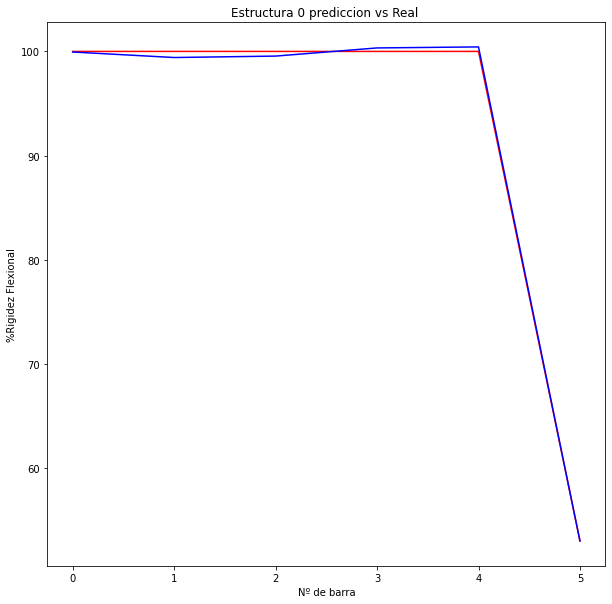

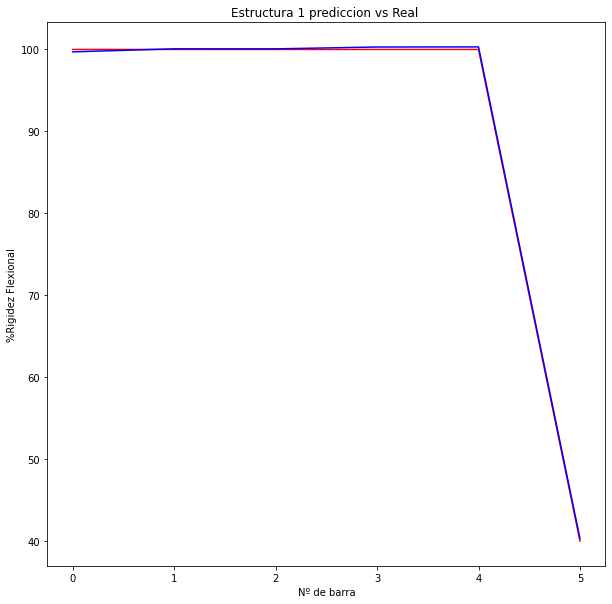

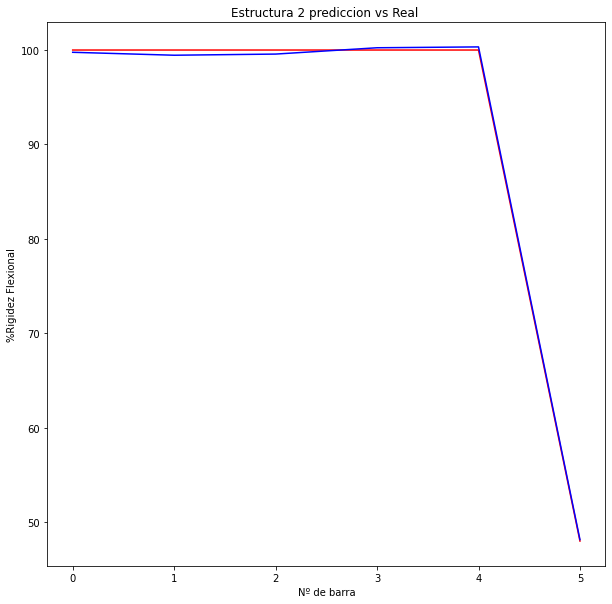

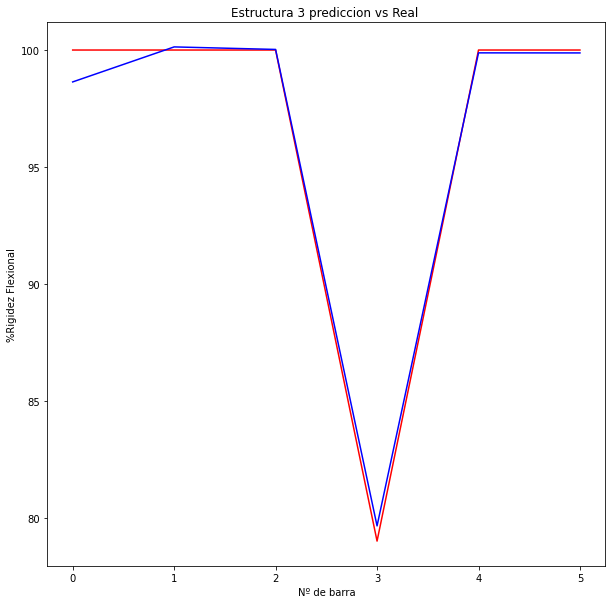

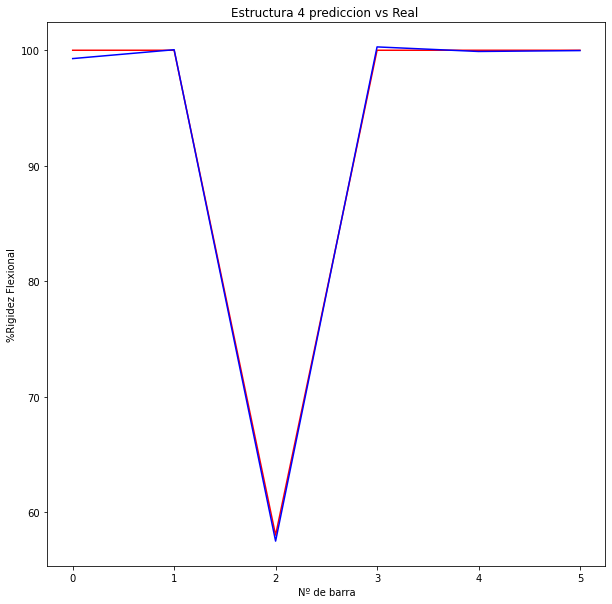

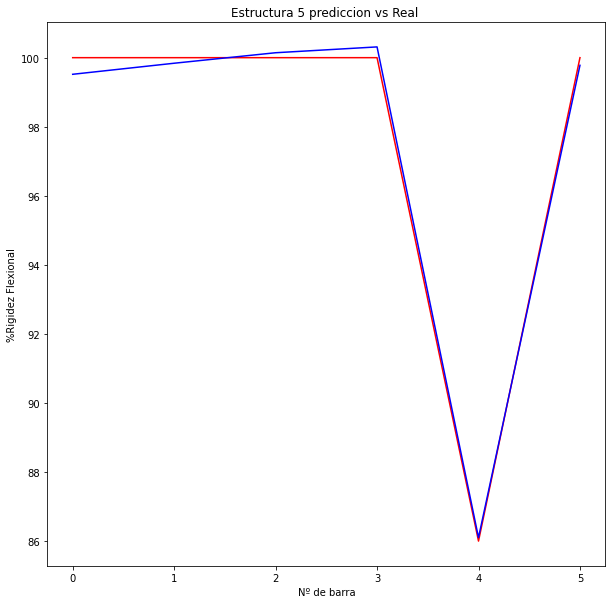

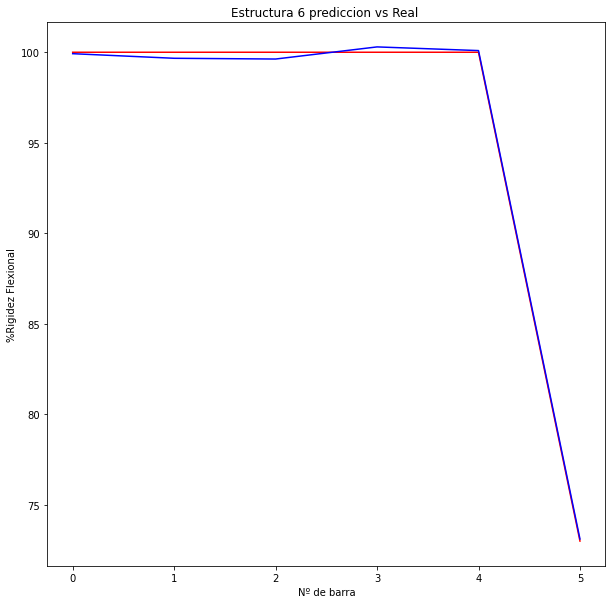

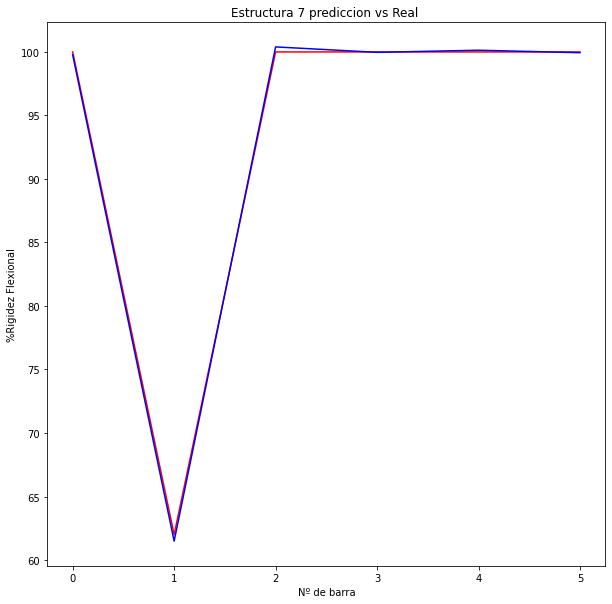

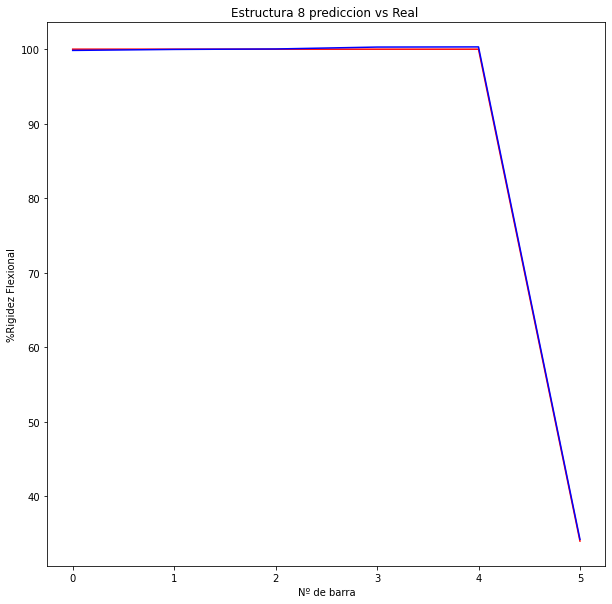

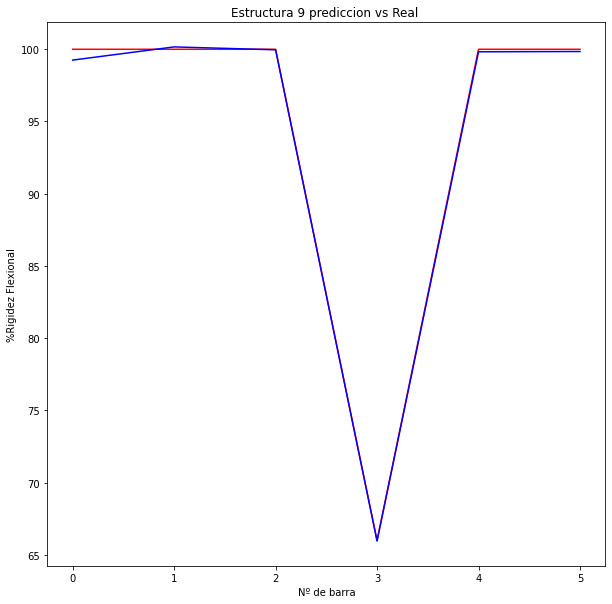

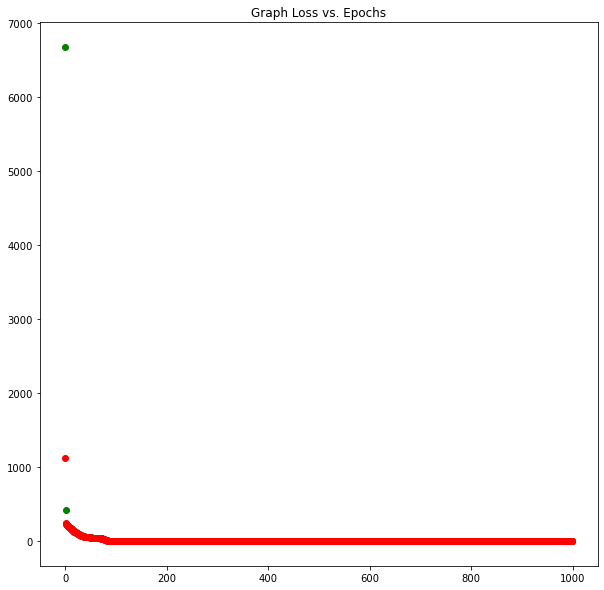

In [8]:
prediccion("input_pasarela4.csv", 13000, 5, "relu", 32, 6, 1000, "test1.csv")
